# Data Scientist Test

This study involves analysing a dataset relating to mortality and building a machine learning algorithm to predict mortality. The dataset includes the following features:

  - ID - a unique row ID.
  - Organisation - The organisation the patient was seen at.
  - Age - The patient’s age.
  - LOS - The patent’s length-of-stay in hospital, in whole days.
  - Death - A flag indicating whether the patient died, coded: 0 =
    survived, 1 = died.
  - Category - The risk category the patient falls into.
  
The study is broken down into the following sections

- Data Check and Clean
- Exploratory Analysis
- Model Selection, Implementation and Interpretation
- Model Testing

# Data Check and Clean

In this section I will load the data into a pandas data frame check for missing values; check the data types in the model; perform data cleaning tasks and look at some preliminary statistics.

### Loading Data

In [2]:
import pandas as pd
df = pd.read_csv("simulated_data.csv")
df.head()

,ID,Organisation,Age,LOS,Death,Category
0,1,Trust1,55,2,0,Low
1,2,Trust2,27,1,0,Low
2,3,Trust3,93,12,0,High
3,4,Trust4,45,3,1,Low
4,5,Trust5,70,11,0,High


### Checking for Missing Values and Data Types

In [3]:
df.isna().sum()

ID              0
Organisation    0
Age             0
LOS             0
Death           0
Category        0
dtype: int64

In [4]:
df.dtypes

ID               int64
Organisation    object
Age              int64
LOS              int64
Death            int64
Category        object
dtype: object

### Preliminary Statistics

Size of dataset

In [5]:
df.shape

(300, 6)

Some preliminary statistics 

In [6]:
df.describe(include='all') 

,ID,Organisation,Age,LOS,Death,Category
count,300.000000,300,300.000000,300.000000,300.000000,300
unique,NaN,10,NaN,NaN,NaN,3
top,NaN,Trust3,NaN,NaN,NaN,Low
freq,NaN,30,NaN,NaN,NaN,160
mean,150.500000,NaN,50.656667,4.936667,0.176667,NaN
std,86.746758,NaN,27.876798,3.617958,0.382024,NaN
min,1.000000,NaN,5.000000,1.000000,0.000000,NaN
25%,75.750000,NaN,24.000000,2.000000,0.000000,NaN
50%,150.500000,NaN,54.000000,4.000000,0.000000,NaN
75%,225.250000,NaN,75.250000,7.000000,0.000000,NaN


As the aim is to predict mortality, it would be useful to know the mortality from the outset.

In [7]:
df["Death"].sum()

53

Out of 300 patients 53 die in hospital

# Exploratory Analysis

In this section I will analyse each feature individually and how it relates to examine how each features relates to mortality.

### Organisation

The organisation involved have the following frequency distribution

In [8]:
df["Organisation"].value_counts()

Trust3     30
Trust6     30
Trust10    30
Trust5     30
Trust2     30
Trust7     30
Trust9     30
Trust4     30
Trust1     30
Trust8     30
Name: Organisation, dtype: int64

There are an equal number of each trust within the Organisation feature. To see how the Trust relates to mortality.

In [9]:
pd.crosstab(df['Organisation'], df['Death'],margins=True)

Death,0,1,All
Organisation,,,
Trust1,23,7,30
Trust10,26,4,30
Trust2,25,5,30
Trust3,24,6,30
Trust4,26,4,30
Trust5,23,7,30
Trust6,26,4,30
Trust7,22,8,30
Trust8,25,5,30


So trust 7 has the most deaths and trust 9 the least.

### Age

A histogram should give an idea as to the distribution age follows

(array([17., 18., 23., 15., 16.,  9., 11.,  9., 12., 10., 12., 14., 16.,
        12., 19., 16., 22., 14., 13., 22.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ,
        54.5, 59. , 63.5, 68. , 72.5, 77. , 81.5, 86. , 90.5, 95. ]),
 <a list of 20 Patch objects>)

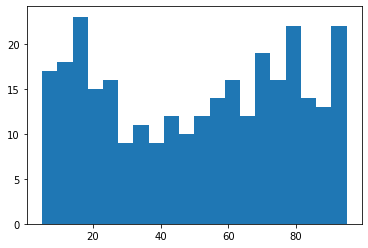

In [10]:
import matplotlib
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1)

# We can set the number of bins with the `bins` kwarg
axs.hist(df["Age"], bins=20)

The distribution of age appears to be approximately uniform. The preceeding box plot show how age relates to mortality

Text(0.5, 1.0, 'Age')

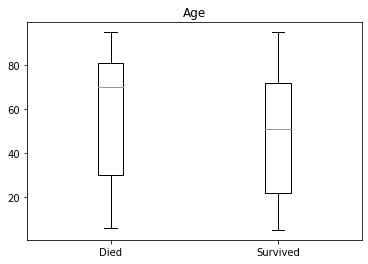

In [11]:
fig, axs = plt.subplots(1, 1)

axs.boxplot([df['Age'][df.Death == 1],df['Age'][df.Death == 0]])
axs.set_xticklabels(['Died','Survived'])
axs.set_title("Age")

The median age of those who died is in fact lower than the median age of those who died, which seems intuitive. The mean age for those who survived and those who died is given below:

In [12]:
print(df['Age'][df.Death == 0].mean())

49.064777327935225


In [13]:
print(df['Age'][df.Death == 1].mean())

58.075471698113205


### Length of Stay

A histogram should give an idea as to the distribution LOS follows

(array([49., 48., 42., 29., 26., 18.,  0., 18., 14., 13., 15., 12.,  7.,
         0.,  2.,  2.,  3.,  0.,  0.,  2.]),
 array([ 1.  ,  1.85,  2.7 ,  3.55,  4.4 ,  5.25,  6.1 ,  6.95,  7.8 ,
         8.65,  9.5 , 10.35, 11.2 , 12.05, 12.9 , 13.75, 14.6 , 15.45,
        16.3 , 17.15, 18.  ]),
 <a list of 20 Patch objects>)

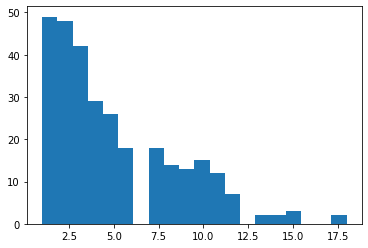

In [14]:
fig, axs = plt.subplots(1, 1)

# We can set the number of bins with the `bins` kwarg
axs.hist(df["LOS"], bins=20)

The distribution of LOS is quite skewed with most people only staying for a few days and few people staying of more than 10 days. The box plots below show how length of stay relates to mortality

Text(0.5, 1.0, 'LOS')

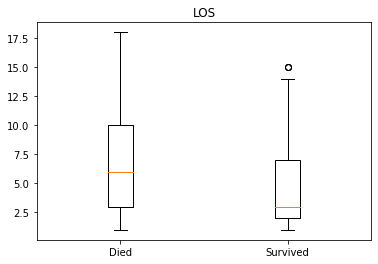

In [15]:
fig, axs = plt.subplots(1, 1)

axs.boxplot([df['LOS'][df.Death == 1],df['LOS'][df.Death == 0]])
axs.set_xticklabels(['Died','Survived'])
axs.set_title("LOS")

The length of stay distribution is clearly different for those who survived and those who died. Generally people who survived had a shorter length of stay. The mean for those who survived and those who died is given below.

In [16]:
print(df['LOS'][df.Death == 0].mean())

4.582995951417004


In [17]:
print(df['LOS'][df.Death == 1].mean())

6.584905660377358


### Category

The frequency distribution of the category features is shown below

In [18]:
df["Category"].value_counts()

Low         160
Moderate     87
High         53
Name: Category, dtype: int64

So most patients are in the LOW category. The following table shows how "Category" relates to "Death".

In [19]:
pd.crosstab(df['Category'], df['Death'],margins=True)

Death,0,1,All
Category,,,
High,39,14,53
Low,146,14,160
Moderate,62,25,87
All,247,53,300


Strangely, the highest proportion of patients die in the moderate category. 25/87 > 14/53. **If this were real data it would definitely be worth checking this issue.**

# Model Selection, Implementation and Interpretation

### Model Selection

I think Logistic Regression and Decision Trees are possible models for this type of data. Logistic regression can be 0 or 1 predictions and is highly interpretable, decisions trees can also make 0 or 1 predictions and are equally interpretable. Comparing both would be interesting, but given the time constraints I will select decision trees as they are arguably better at handling discrete data and given the exploratory analysis the categorical feature "category" is likely to be very important.

### Model Implementation

First the category data will need converting to numeric data for compatibility with the sci-kit learn decision tree implementation.

In [20]:
from sklearn import tree, preprocessing
# as the decision tree classifier can only handle numeric data, Sex and Embarked will need to be transformed
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])
le.fit(df['Organisation'])
df['Organisation'] = le.transform(df['Organisation'])
df.head()

,ID,Organisation,Age,LOS,Death,Category
0,1,0,55,2,0,1
1,2,2,27,1,0,1
2,3,3,93,12,0,0
3,4,4,45,3,1,1
4,5,5,70,11,0,0


### Fitting the Model to the Data

In [21]:
features = ['Age','Organisation','LOS','Category']
dtree = tree.DecisionTreeClassifier(max_depth=3,criterion="entropy")
dtree.fit(df[features],df['Death'])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(319.6875, 396.375, 'X[0] <= 72.5\nentropy = 0.673\nsamples = 300\nvalue = [247, 53]'),
 Text(174.375, 283.125, 'X[2] <= 11.5\nentropy = 0.548\nsamples = 213\nvalue = [186, 27]'),
 Text(116.25, 169.875, 'X[3] <= 1.5\nentropy = 0.487\nsamples = 208\nvalue = [186, 22]'),
 Text(58.125, 56.625, 'entropy = 0.386\nsamples = 159\nvalue = [147, 12]'),
 Text(174.375, 56.625, 'entropy = 0.73\nsamples = 49\nvalue = [39, 10]'),
 Text(232.5, 169.875, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(465.0, 283.125, 'X[0] <= 75.5\nentropy = 0.88\nsamples = 87\nvalue = [61, 26]'),
 Text(348.75, 169.875, 'X[1] <= 8.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(290.625, 56.625, 'entropy = 0.881\nsamples = 10\nvalue = [3, 7]'),
 Text(406.875, 56.625, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(581.25, 169.875, 'X[0] <= 76.5\nentropy = 0.817\nsamples = 75\nvalue = [56, 19]'),
 Text(523.125, 56.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(639.375, 56.625, 'entropy 

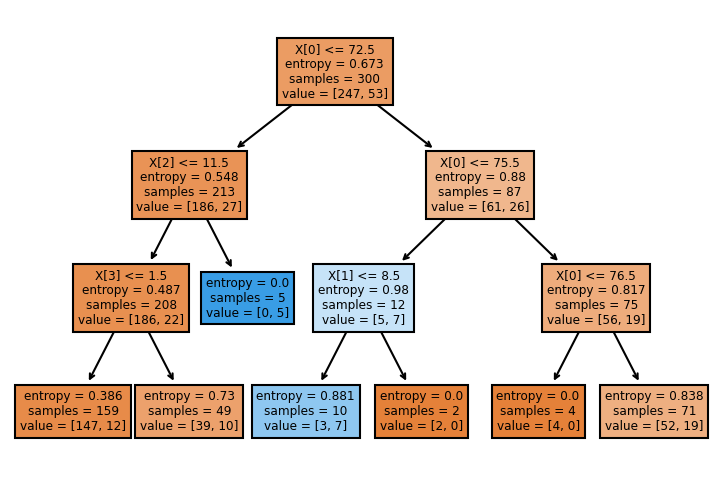

In [22]:
plt.figure(dpi=150)
tree.plot_tree(dtree, filled=True)

### Model Interpretation

The "browner" the cell the greater the proportion of patients who survive and the "bluer" the cell the greater the proportion of patient who died. The algorithm identifies an age of 72.5 (age is X[0]) as the best first split, which will reduce the entropy by the maximum amount. I believe this model suffers from age and LOS being used as "identifiers", note that "category" is not used until the third level. I will round the age to the nearest 10 and LOS to the nearest whole number and see how this effects the model.

In [23]:
df["AgeN10"] = df["Age"].round(-1)
df["LOSNWN"] = df["LOS"].round(0)

In [24]:
features = ['AgeN10','Organisation','LOSNWN','Category']
dtree = tree.DecisionTreeClassifier(max_depth=3,criterion="entropy")
dtree.fit(df[features],df['Death'])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(402.40384615384613, 396.375, 'X[3] <= 1.5\nentropy = 0.673\nsamples = 300\nvalue = [247, 53]'),
 Text(214.6153846153846, 283.125, 'X[0] <= 65.0\nentropy = 0.561\nsamples = 213\nvalue = [185, 28]'),
 Text(107.3076923076923, 169.875, 'X[2] <= 11.0\nentropy = 0.416\nsamples = 155\nvalue = [142, 13]'),
 Text(53.65384615384615, 56.625, 'entropy = 0.35\nsamples = 152\nvalue = [142, 10]'),
 Text(160.96153846153845, 56.625, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(321.9230769230769, 169.875, 'X[2] <= 8.5\nentropy = 0.825\nsamples = 58\nvalue = [43, 15]'),
 Text(268.2692307692308, 56.625, 'entropy = 0.946\nsamples = 33\nvalue = [21, 12]'),
 Text(375.5769230769231, 56.625, 'entropy = 0.529\nsamples = 25\nvalue = [22, 3]'),
 Text(590.1923076923077, 283.125, 'X[2] <= 11.5\nentropy = 0.865\nsamples = 87\nvalue = [62, 25]'),
 Text(536.5384615384615, 169.875, 'X[0] <= 55.0\nentropy = 0.816\nsamples = 83\nvalue = [62, 21]'),
 Text(482.88461538461536, 56.625, 'entropy = 0.996\nsamples

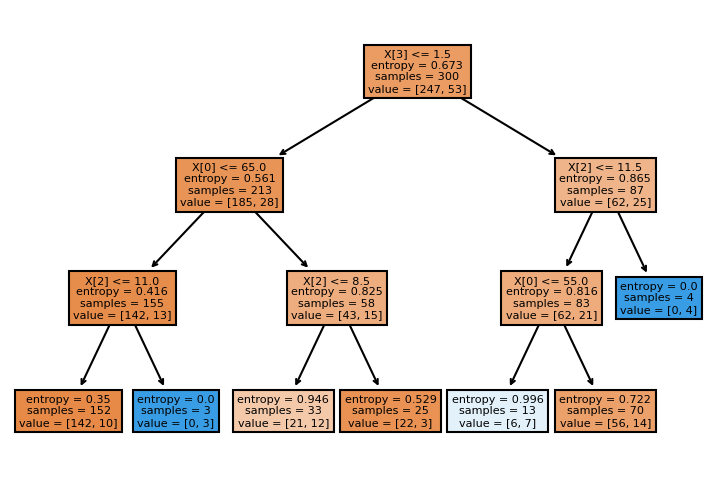

In [25]:
plt.figure(dpi=150)
tree.plot_tree(dtree, filled=True)

I think this is a more satisfactory model. As it stops the continuous variables being used as unique identifiers. Further, useful results can be found, such as all of the medium risk patients who stayed for 12 days or longer died. Confirmed by subsetting below.

In [28]:
df["Category"].value_counts()

1    160
2     87
0     53
Name: Category, dtype: int64

In [27]:
df["Death"][df.Category > 1.5][df.LOSNWN > 11.5]

14     1
26     1
144    1
214    1
Name: Death, dtype: int64

If I had time to go further I would investigate using logistic regression, as this approach is very interpretable and could lead to further insights to help understand the data. However, I have reached the time limit. I'll include a few notes below regarding how I would test this model below.

### Model Testing

Ideally I would have with held say 50 records which could have been used as a testing set, used the model to make predictions and formed a confusion table to assess the model.